# Loan Approval Prediction using Logistic Regression  

This notebook performs **loan approval prediction** based on various applicant attributes. The workflow includes:  

## **🔹 Steps Covered in This Notebook**
1️⃣ **Loading Data**: Reads train and test datasets from CSV files.  
2️⃣ **Exploratory Data Analysis (EDA)**: Displays dataset information, summary statistics, and missing values.  
3️⃣ **Data Visualization**: Generates plots to analyze:
   - Loan approval distribution
   - Income distribution
   - Loan amount comparison  

4️⃣ **Handling Missing Values**: Fills missing categorical data using mode and numerical data using mean.  
5️⃣ **Feature Encoding**: Converts categorical variables into numerical format using Label Encoding.  
6️⃣ **Data Preprocessing**:
   - Splitting features (`X`) and target (`Y`)
   - Ensuring consistency between training and test sets
   - Normalizing numerical columns using StandardScaler  

7️⃣ **Handling Class Imbalance**: Applies **SMOTE (Synthetic Minority Over-sampling Technique)** to balance data.  
8️⃣ **Model Training**: Trains a **Logistic Regression Model** for loan approval prediction.  
9️⃣ **Model Evaluation**:
   - Computes **Accuracy, Precision, Recall, and F1-score**
   - **Confusion Matrix Visualization** to assess model performance  
   
🔟 **Making Predictions**:
   - Predicts loan approvals on new/unseen data  
   - Saves results in a CSV file  
🔹 **Final Model Performance Visualization**: Compares actual vs predicted loan approvals in a histogram.  

---
✅ **By the end of this notebook, you will have a trained model that predicts loan approvals accurately!** 🚀


In [19]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE



In [20]:
# Load datasets
train_file_path = "C:/AI_Work/Talha_Abbas/train_u6lujuX_CVtuZ9i.csv"
test_file_path = "C:/AI_Work/Talha_Abbas/test_Y3wMUE5_7gLdaTN.csv"
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)



In [21]:
# Exploratory Data Analysis (EDA)
print("Basic Information about Dataset:")
print(train_df.info())
print("\nSummary Statistics:")
print(train_df.describe())
print("\nMissing Values:")
print(train_df.isnull().sum())



Basic Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Summary Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8904\627910058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=train_df, palette='coolwarm')


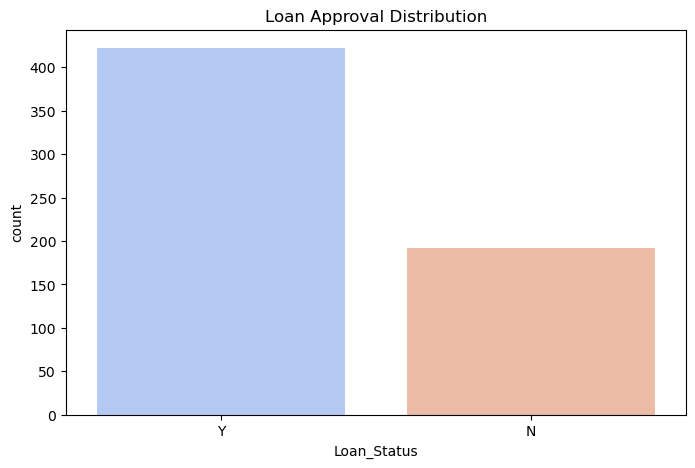

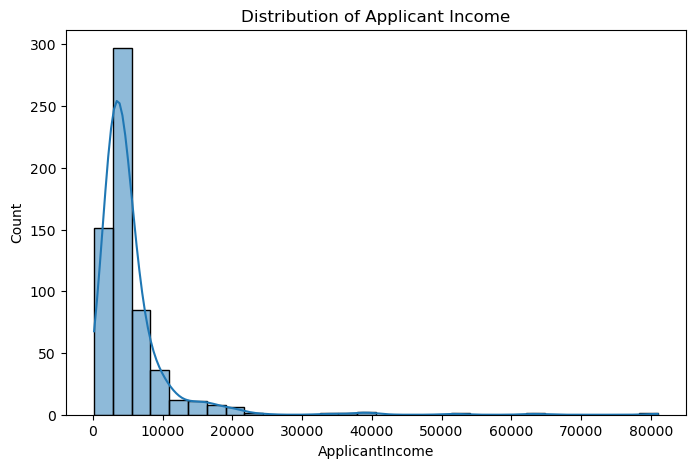

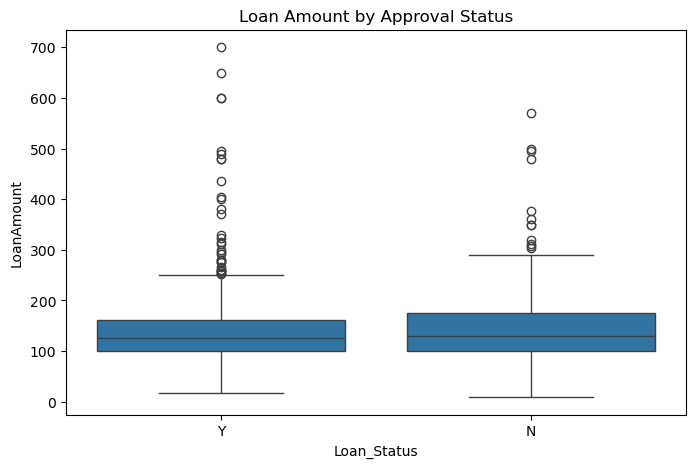

In [22]:
# Visualizations
plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Status', data=train_df, palette='coolwarm')
plt.title("Loan Approval Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(train_df['ApplicantIncome'], bins=30, kde=True)
plt.title("Distribution of Applicant Income")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=train_df)
plt.title("Loan Amount by Approval Status")
plt.show()



In [23]:
# Handling missing values
missing_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in missing_cols:
    if col in train_df.columns:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    if col in test_df.columns:
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)

if 'LoanAmount' in train_df.columns:
    train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)
if 'LoanAmount' in test_df.columns:
    test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)
else:
    test_df['LoanAmount'] = train_df['LoanAmount'].mean()
    print("Warning: 'LoanAmount' column was missing in test dataset and has been added with mean value!")



C:\Users\ASUS\AppData\Local\Temp\ipykernel_8904\3683402480.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8904\3683402480.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [24]:
# Encoding categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in categorical_cols:
    if col in train_df.columns:
        train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])



In [25]:
# Convert target variable 'Loan_Status' (Y/N) to numerical (1/0)
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Splitting data into features and target
X_train = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
y_train = train_df['Loan_Status']
X_test = test_df.drop(columns=['Loan_ID'])

# Ensure the test set has the same feature names as the train set
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns with default values
X_test = X_test[X_train.columns]  # Reorder columns to match training set



In [32]:
# Normalize numerical columns
scaler = StandardScaler()
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\ASUS\.conda\envs\pytorch_gpu\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [27]:
# Evaluate Model
print("Model Accuracy:", accuracy_score(y_train_resampled, model.predict(X_train_resampled)))
print("Classification Report:")
print(classification_report(y_train_resampled, model.predict(X_train_resampled)))



Model Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70       422
           1       0.69      0.92      0.79       422

    accuracy                           0.75       844
   macro avg       0.78      0.75      0.74       844
weighted avg       0.78      0.75      0.74       844



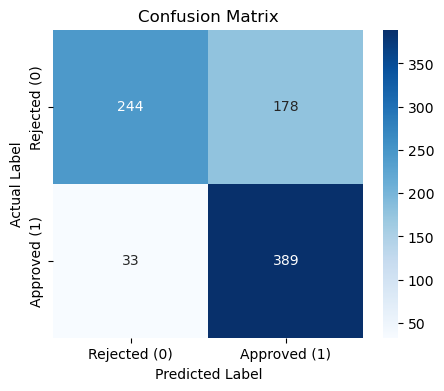

In [28]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_train_resampled, model.predict(X_train_resampled))
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Rejected (0)", "Approved (1)"], 
            yticklabels=["Rejected (0)", "Approved (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()



In [29]:
# Function to predict new loan applications
def predict_new_loan(new_data):
    expected_features = len(X_train.columns)
    if len(new_data) != expected_features:
        raise ValueError(f"Expected {expected_features} features, but got {len(new_data)}")
    new_data_df = pd.DataFrame([new_data], columns=X_train.columns)
    new_data_df[numeric_cols] = scaler.transform(new_data_df[numeric_cols])
    prediction = model.predict(new_data_df)
    return "Approved" if prediction[0] == 1 else "Rejected"



In [30]:
# Example usage
new_loan_application = [1, 1, 1, 0, 5000, 1500, 200, 360, 1, 2, 1]  # Sample input
print("New Loan Prediction:", predict_new_loan(new_loan_application))



New Loan Prediction: Approved


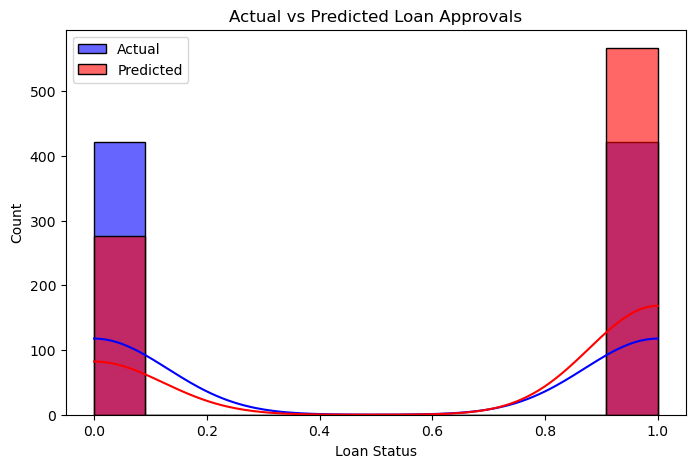

Predictions saved successfully.


In [31]:
# Save predictions on test dataset
test_df['Loan_Status_Predicted'] = y_pred
test_df[['Loan_ID', 'Loan_Status_Predicted']].to_csv("C:/AI_Work/Talha_Abbas/loan_predictions.csv", index=False)

# Visualization of Actual vs Predicted Loan Approvals
plt.figure(figsize=(8, 5))
sns.histplot(y_train_resampled, label='Actual', kde=True, color='blue', alpha=0.6)
sns.histplot(model.predict(X_train_resampled), label='Predicted', kde=True, color='red', alpha=0.6)
plt.legend()
plt.title("Actual vs Predicted Loan Approvals")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

print("Predictions saved successfully.")
